In [ ]:
Clustering the Batsmen and the Bowlers according to their Performance from IPL Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from io import StringIO
from sklearn.cluster import KMeans

In [2]:
runs=pd.read_excel('/content/IPL Ball-by-Ball 2008-2020.xlsx')
runs.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007-08-01 00:00:00,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
runs.shape

(193617, 22)

In [ ]:
Taking only relevant data from balldata for analysis

In [ ]:
runs = runs[["match_id", "ball", "striker","bowler", "runs_off_bat", "extras" , "wides", "noballs", "legbyes", "player_dismissed"]]
runs.head()

,match_id,ball,striker,bowler,runs_off_bat,extras,wides,noballs,legbyes,player_dismissed
0,335982,0.1,SC Ganguly,P Kumar,0,1,NaN,NaN,1.0,NaN
1,335982,0.2,BB McCullum,P Kumar,0,0,NaN,NaN,NaN,NaN
2,335982,0.3,BB McCullum,P Kumar,0,1,1.0,NaN,NaN,NaN
3,335982,0.4,BB McCullum,P Kumar,0,0,NaN,NaN,NaN,NaN
4,335982,0.5,BB McCullum,P Kumar,0,0,NaN,NaN,NaN,NaN


In [ ]:
runs.isnull().sum()

match_id                 0
ball                     0
striker                  0
bowler                   0
runs_off_bat             0
extras                   0
wides               187753
noballs             192848
legbyes             190506
player_dismissed    184095
dtype: int64

In [ ]:
runs["noballs"] = runs["noballs"].fillna(0)
runs["legbyes"] = runs["legbyes"].fillna(0)
runs["wides"] = runs["wides"].fillna(0)
runs["player_dismissed"] = runs["player_dismissed"].fillna(0)

In [ ]:
runs.isnull().sum()

match_id            0
ball                0
striker             0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
legbyes             0
player_dismissed    0
dtype: int64

In [ ]:
        Creation of Batsmen dataset and calculation of their strike rate
To analyse the strike rate of a bastman, we need "runs" scored by him and the "number of balls" he faced.
The strike rate for the batsman can be calculated from these two values.

In [ ]:
A = []
B = []
C = []
for i in runs["striker"].unique():
 a = runs["runs_off_bat"][runs["striker"] == i].sum() #sum of runs scored by the player
 balls =  runs["match_id"][runs['striker']== i].count() - runs['noballs'][runs["striker"]== i].sum() - runs['wides'][runs["striker"]== i].sum()
 out = runs["match_id"][runs['player_dismissed']== i].count()
# The strike rate for the batsman can be calculated from these two values.
 A.append(a)
 B.append(balls)
 C.append(out)

In [ ]:
Batsmen = pd.DataFrame({"Player_names": runs["striker"].unique()})
Batsmen["Runs"] = A
Batsmen["Balls_played"] = B
Batsmen["Out"] = C
Batsmen.head(10)

,Player_names,Runs,Balls_played,Out
0,SC Ganguly,1349,1243.0,53
1,BB McCullum,2882,2118.0,104
2,RT Ponting,91,127.0,9
3,DJ Hussey,1322,1063.0,49
4,Mohammad Hafeez,64,83.0,7
5,R Dravid,2174,1865.0,77
6,W Jaffer,130,121.0,8
7,V Kohli,5888,4462.0,154
8,JH Kallis,2427,2195.0,85
9,CL White,971,757.0,36


In [ ]:
Batsmen = Batsmen[Batsmen["Balls_played"] > 300]
Batsmen.head()

,Player_names,Runs,Balls_played,Out
0,SC Ganguly,1349,1243.0,53
1,BB McCullum,2882,2118.0,104
3,DJ Hussey,1322,1063.0,49
5,R Dravid,2174,1865.0,77
7,V Kohli,5888,4462.0,154


In [ ]:
Batsmen.sample(15)

,Player_names,Runs,Balls_played,Out
53,LR Shukla,405,346.0,27
201,R Ashwin,412,373.0,38
203,CA Pujara,390,384.0,19
167,PC Valthaty,505,413.0,22
431,N Rana,1437,1055.0,52
354,KL Rahul,2653,1941.0,61
17,ML Hayden,1107,781.0,31
192,J Botha,409,358.0,20
413,KH Pandya,1000,699.0,41
254,AJ Finch,2006,1557.0,79


In [ ]:
Since we have to assess batsmen, the players with very low strike rates are not required to be considered as they tend to bat very few times and are usually bowlers/fielders.

In [ ]:
Batsmen["Strike_Rate"] = (Batsmen["Runs"] * 100 / Batsmen["Balls_played"]).round(2)
Batsmen["Average"] = (Batsmen["Runs"] / Batsmen["Out"]).round(2)
Batsmen.head(10)

,Player_names,Runs,Balls_played,Out,Strike_Rate,Average
0,SC Ganguly,1349,1243.0,53,108.53,25.45
1,BB McCullum,2882,2118.0,104,136.07,27.71
3,DJ Hussey,1322,1063.0,49,124.37,26.98
5,R Dravid,2174,1865.0,77,116.57,28.23
7,V Kohli,5888,4462.0,154,131.96,38.23
8,JH Kallis,2427,2195.0,85,110.57,28.55
9,CL White,971,757.0,36,128.27,26.97
10,MV Boucher,394,307.0,14,128.34,28.14
13,P Kumar,340,307.0,38,110.75,8.95
16,PA Patel,2848,2336.0,126,121.92,22.60


In [ ]:
Checking the distribution of batsmen by plotting in a histogram
 x axis is the strike rate y axis is the number of players

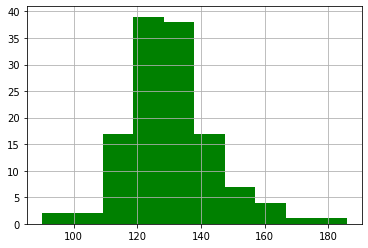

In [ ]:
Batsmen["Strike_Rate"].hist(color="green")

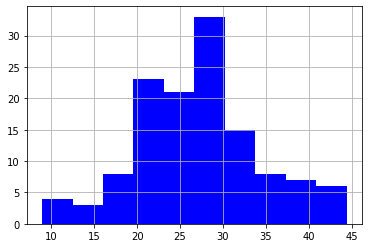

In [ ]:
Batsmen["Average"].hist(color="blue")

In [ ]:
Applying Kmeans Algorithm to the batsmen dataset
Batsman cluster - strike rate

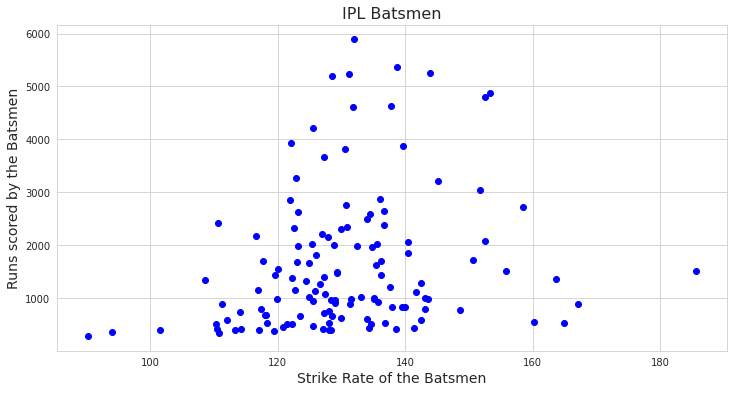

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Strike_Rate"], Batsmen["Runs"], color="blue")
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()

In [ ]:
The distribution of the Batsmen appears to be in largely five clusters: 
under 500 runs  
highest density of dots 500 - 1000 runs
1000 - 2000 runs 
2000 - 3000 runs 
above 3000 runs

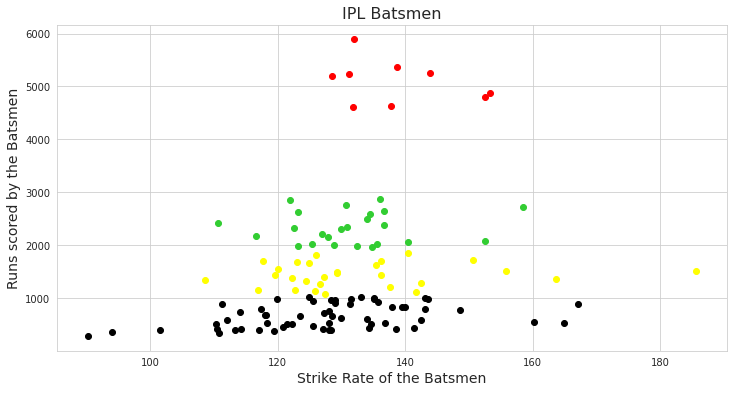

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Strike_Rate", "Runs"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "black", "limegreen", "red", "yellow"]

for r in range(1,5):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_Rate"], clustered_Batsmen["Runs"], color=colors[r])
    
plt.title("IPL Batsmen", fontsize=16)
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
    
plt.show()

In [ ]:
Batsmen.sample(15)

,Player_names,Runs,Balls_played,Out,Strike_Rate,Average,cluster
71,DJ Bravo,1490,1153.0,66,129.23,22.58,4
204,OA Shah,506,376.0,15,134.57,33.73,1
201,R Ashwin,412,373.0,38,110.46,10.84,1
103,HH Gibbs,886,797.0,32,111.17,27.69,1
129,DB Ravi Teja,375,314.0,19,119.43,19.74,1
64,DPMD Jayawardene,1808,1436.0,64,125.91,28.25,4
207,MS Bisla,798,680.0,38,117.35,21.00,1
351,SV Samson,2584,1922.0,93,134.44,27.78,2
30,YK Pathan,3222,2220.0,110,145.14,29.29,0
42,AC Gilchrist,2069,1473.0,76,140.46,27.22,2


In [ ]:
Batsmen Clusters - AVERAGE

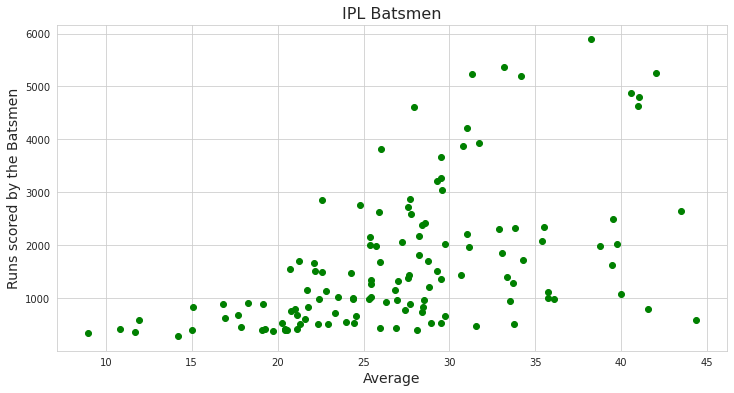

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Average"], Batsmen["Runs"], color="green")
plt.xlabel("Average", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()

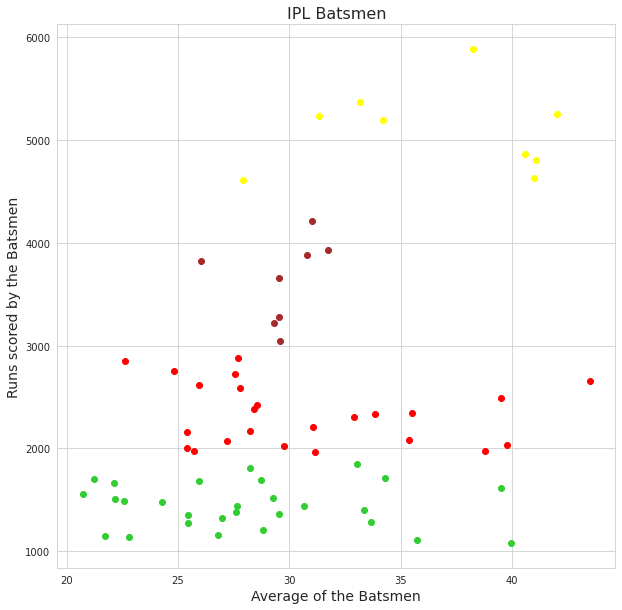

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(Batsmen[["Average", "Runs"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(10,10))

colors = ["blue", "brown", "limegreen", "red","yellow"]

for r in range(1,5):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Average"], clustered_Batsmen["Runs"], color=colors[r])
    
plt.title("IPL Batsmen", fontsize=16)
plt.xlabel("Average of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
    
plt.show()

In [ ]:
Batsmen.sample(15)

,Player_names,Runs,Balls_played,Out,Strike_Rate,Average,cluster
64,DPMD Jayawardene,1808,1436.0,64,125.91,28.25,2
383,LMP Simmons,1079,847.0,27,127.39,39.96,2
45,A Symonds,974,741.0,27,131.44,36.07,0
182,M Vijay,2619,2126.0,101,123.19,25.93,3
315,SP Narine,892,534.0,53,167.04,16.83,0
398,SN Khan,441,312.0,17,141.35,25.94,0
79,SS Tiwary,1379,1128.0,50,122.25,27.58,2
7,V Kohli,5888,4462.0,154,131.96,38.23,4
155,KP Pietersen,1001,741.0,28,135.09,35.75,0
106,SE Marsh,2489,1858.0,63,133.96,39.51,3


In [ ]:
Creation of Bowlers dataset and calculation of their economy rate

In [ ]:
# To analyse the performance of a bowler, we need runs given by him and the number of overs he bowled.
# The economy rate of the bowler can be calculated from these two values.
D = []
E = []

for j in runs["bowler"].unique():
    #runs given by him can be calculated by the sum of the runs and extras given by a bowler
    d = runs["runs_off_bat"][runs["bowler"] == j].sum() + runs["wides"][runs["bowler"] == j].sum() + runs["noballs"][runs["bowler"] == j].sum() 
        #counting the number of balls bowled by a bowler
    e = ((runs["ball"][runs["bowler"] == j].count() - runs["wides"][runs["bowler"] == j].sum() - runs["noballs"][runs["bowler"] == j].sum()) // 6)
    
    D.append(d)
    E.append(e)
 

In [ ]:
Bowlers = pd.DataFrame({"Bowler_names": runs["bowler"].unique()})
Bowlers["Runs"] = D
Bowlers["Overs"] = E
Bowlers.head()

,Bowler_names,Runs,Overs
0,P Kumar,3251.0,415.0
1,Z Khan,2782.0,364.0
2,AA Noffke,40.0,3.0
3,JH Kallis,2293.0,288.0
4,SB Joshi,82.0,9.0


In [ ]:
Bowlers = Bowlers[Bowlers["Overs"] > 100]
Bowlers.head()

,Bowler_names,Runs,Overs
0,P Kumar,3251.0,415.0
1,Z Khan,2782.0,364.0
3,JH Kallis,2293.0,288.0
6,AB Dinda,2073.0,250.0
7,I Sharma,2604.0,316.0


In [ ]:
# Economy rate can be calculated by dividing the total runs conceded by the number of overs bowled.
Bowlers["Econ_Rate"] = (Bowlers["Runs"] / Bowlers["Overs"]).round(2)
Bowlers.head()

,Bowler_names,Runs,Overs,Econ_Rate
0,P Kumar,3251.0,415.0,7.83
1,Z Khan,2782.0,364.0,7.64
3,JH Kallis,2293.0,288.0,7.96
6,AB Dinda,2073.0,250.0,8.29
7,I Sharma,2604.0,316.0,8.24


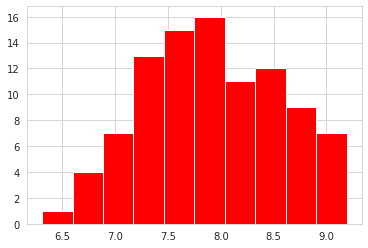

In [ ]:
Bowlers["Econ_Rate"].hist(color="red")

In [ ]:
There is no need to cluster the players below economy rate of 4 as they are the star bowlers. 
Similarly, bowlers with economy rates above 12.5 are not likely to be good candidates for bowling. 
They are most likely batsmen, and thus, they too can be excluded.

In [ ]:
Applying K-means algorithm to bowlers dataset

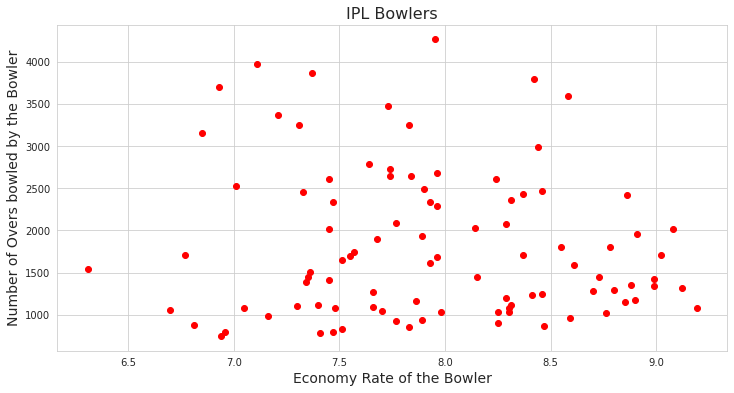

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Bowlers["Econ_Rate"], Bowlers["Runs"], color="red")
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
plt.title("IPL Bowlers", fontsize=16)
plt.show()

In [ ]:
The distribution appears to be largely in 5 clusters again
With runs under 500
With runs under 500 - 1000
With runs under 1000 - 1500 
With runs under 1500 - 2000 
With runs above 2000

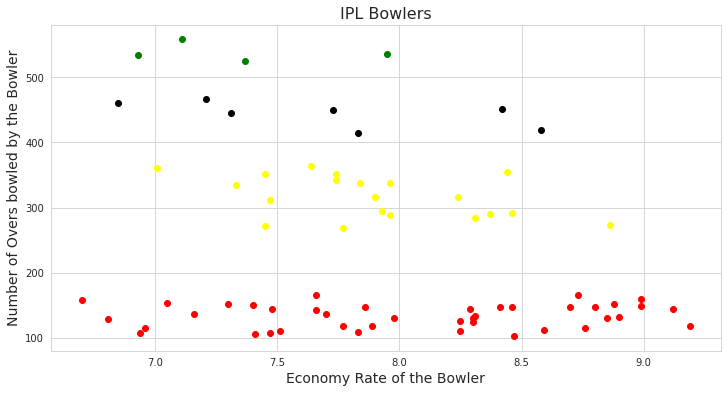

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Bowlers[["Econ_Rate", "Overs"]])
Bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "green", "black", "red","yellow"]

for r in range(1,5):
    clustered_Bowlers = Bowlers[Bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Overs"], color=colors[r])
    
plt.title("IPL Bowlers", fontsize=16)
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
plt.show()

In [ ]:
Bowlers Clusters

In [ ]:
Bowlers.sample(15)

,Bowler_names,Runs,Overs,Econ_Rate,cluster
66,DW Steyn,2523.0,360.0,7.01,4
38,RP Singh,2338.0,295.0,7.93,4
250,MG Johnson,1708.0,204.0,8.37,0
277,NM Coulter-Nile,925.0,119.0,7.77,3
307,SN Thakur,1340.0,149.0,8.99,3
30,SK Trivedi,1904.0,248.0,7.68,0
19,MS Gony,1287.0,148.0,8.70,3
89,RA Jadeja,3470.0,449.0,7.73,2
14,IK Pathan,2649.0,338.0,7.84,4
348,K Rabada,1113.0,134.0,8.31,3
